In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [3]:
train = pd.read_csv('titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

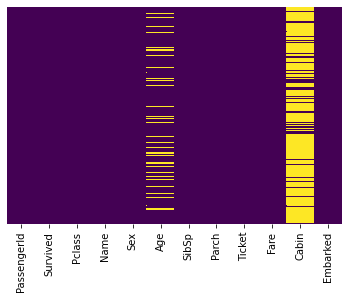

In [6]:
#creating heat map to see missing data
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

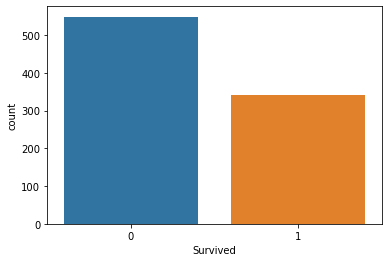

In [7]:
#survived not-survived ratio
sns.countplot(x='Survived', data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

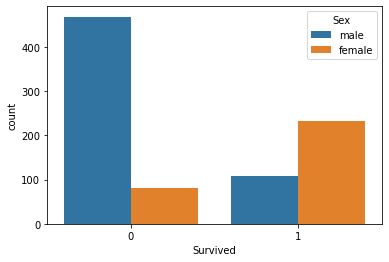

In [8]:
#survived not-survived ratio based on sex
sns.countplot(x='Survived', hue='Sex', data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

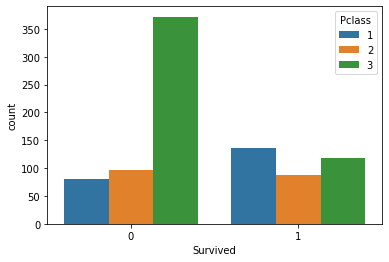

In [9]:
sns.countplot(x='Survived', hue='Pclass', data=train)

<AxesSubplot:ylabel='Frequency'>

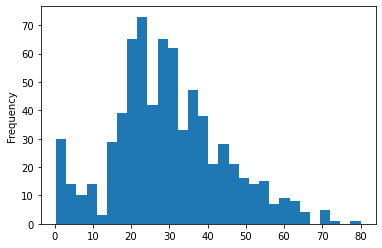

In [10]:
train['Age'].plot.hist(bins=30)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

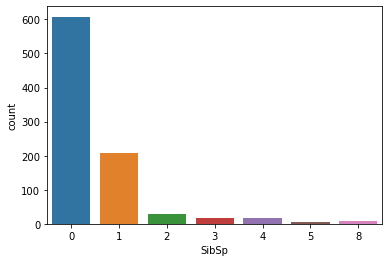

In [12]:
sns.countplot(x='SibSp', data=train)

<AxesSubplot:ylabel='Frequency'>

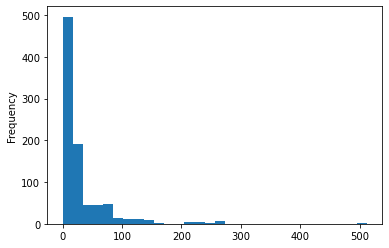

In [13]:
train['Fare'].plot.hist(bins=30)

In [14]:
import cufflinks as cf

In [15]:
cf.go_offline()

In [16]:
train['Fare'].iplot(kind='hist', bins=30)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

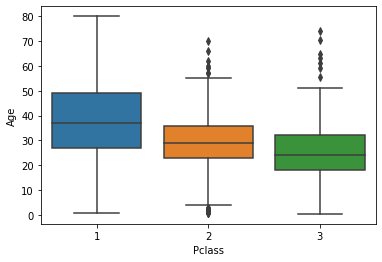

In [17]:
sns.boxplot(x='Pclass', y='Age', data=train)

In [18]:
mage_pclass1 = train[train['Pclass'] == 1]['Age'].mean()
mage_pclass2 = train[train['Pclass'] == 2]['Age'].mean()
mage_pclass3 = train[train['Pclass'] == 3]['Age'].mean()
print(mage_pclass1,mage_pclass2,mage_pclass3)

38.233440860215055 29.87763005780347 25.14061971830986


In [19]:
#filling null values in age column
    
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 25
    
    else:
        return Age


In [20]:
#train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
train['Age'] = train.apply(impute_age, axis=1)

<AxesSubplot:>

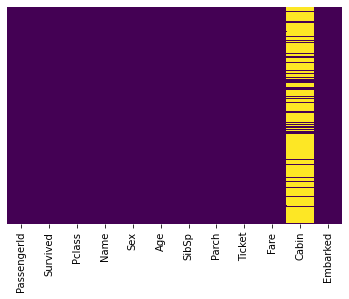

In [21]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
#missing age values are filled

In [22]:
train.drop('Cabin', axis=1, inplace=True)

In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,3,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,4,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,5,0,0,373450,8.0500,S


<AxesSubplot:>

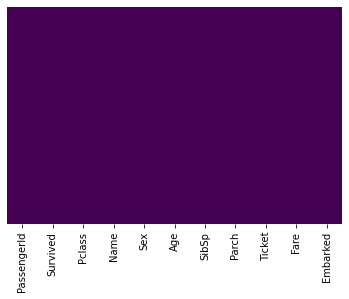

In [24]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [25]:
#dropping other missing values (if any)
train.dropna(inplace=True)

In [26]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [27]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [28]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,PC 17599,71.2833,C


In [29]:
train = pd.concat([train,sex,embark],axis=1)

In [30]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,PC 17599,71.2833,C,0,0,0


In [31]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1, inplace = True)

In [32]:
train.drop(['PassengerId'],axis=1, inplace=True)

In [33]:
train.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,1,1,0,7.2500,1,0,1
1,1,1,2,1,0,71.2833,0,0,0


In [34]:
#Training Data
X = train.drop('Survived', axis=1)
y = train['Survived']

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
logmodel = LogisticRegression(max_iter=1000)

In [39]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [40]:
predictions = logmodel.predict(X_test)

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

    accuracy                           0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [47]:
#consufion matrix
from sklearn.metrics import confusion_matrix

In [49]:
confusion_matrix(y_test, predictions)

array([[151,  12],
       [ 36,  68]], dtype=int64)